# Regression

## 1. Introduction
In the previous four weeks, we've learned basic tools for working with and visualizing data, and now it's time to put those skills to use. In the first week, you may remember that I asked you what you thought constitutes AI -- this is where we start getting into that.

One of the fundamental tasks of AI is pattern recognition from data -- that is, collecting data from the real world, and then analyzing it to find patterns that can then be used as the basis for behaviour. That is, we want to be able to recognize patterns, and use those patterns to make predictions for our own benefit. Thus, most of the AI and machine learning we will be doing requires four components:

1. A dataset;
2. A function with a set of **parameters** (more on this in a bit);
3. A cost function; and,
4. An optimizer.

We don't need to think about the last two items too much, since we can rely on libraries to do that for us. For now, we only need to worry about a) having a dataset, and b) a function with a set of parameters that we can fit to the data.

There are multiple different types of pattern recognition, but we can broadly categorize them as belonging to one of three different problems: 

- **Regression**, where we find a function that fits to some dataset (**continuous data only**);
- **Classification**, where we find a boundary between different classes of data (**discrete data only**); and,
- **Clustering**, where we take unorganized data, and organize it according to its attributes (**both**).

Today, we'll be covering regression, which you can imagine as looking something like this:

![img](https://upload.wikimedia.org/wikipedia/commons/b/be/Normdist_regression.png)


So what are we looking at here? The red points are our **data points**. Say we go out and collect data on house prices, and plot the number of rooms versus the price of the house -- we would end up with a bunch of dots like we see here. The red dots are what is called a **scatter plot**. 

Hopefully, our dots follow some shape that lets us draw a line through them. That's what the blue line is in the figure above -- the **line of best fit**. The blue line has the **smallest average distance** to each point, and -- if the relationship is good -- let's us make **predictions** about our y-value (the value of interest) given some x-value. 

So what use is this? Well, our line takes the form:

$$y = \beta x + \alpha$$

Which means that if we know $\alpha$ and $\beta$, and we get some value for x, we can predict y! To revisit the housing price example, if we plotted data for the number of rooms along the x-axis, and the price along the y-axis, and found a way to calculate $\alpha$ and $\beta$, we could predict how much that house is worth. If the value given to us is lower, we could buy it resell it for a higher value. Similarly, if the price was higher than we would expect from our **model**, then we could wait for the price to drop.

The catch here is that we need to know the **parameters** $\alpha$ and $\beta$, which is what the process of regression is all about -- finding the right parameters. In the simplest case, which is linear regression, we can do this using a mathematical formula that can be calculated by hand. When we get to more complex datasets and functions, we have clever methods for finding parameters in complex functions like neural networks.

Okay, let's get started. The task below is **very similar to what you'll be doing in assignment 1.**

## 2. Linear Regression

First we'll generate a dummy dataset to work with (you won't do this in your assignment -- you'll be given a dataset to work with instead):

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

#generate random data
np.random.seed(123)

#200 values standard deviation of 3 and mean 2.5
X = 3 * np.random.randn(200) + 2.5

#200 residual terms
e = 0.25 * np.random.randn(200)

#actual values for Y
Y = 3 + 0.5 * X + e

Next, we'll load the data into a pandas dataframe since it will make our lives a bit easier:

In [177]:
#create a pandas dataframe
dta = pd.DataFrame({'X':X, 'Y':Y})

#show dataframe's head
dta.head()

,X,Y
0,-0.756892,2.797382
1,5.492036,5.596492
2,3.348935,5.224643
3,-2.018884,2.162632
4,0.764199,3.380523


Finally, we'll do the following calculations to get our $\alpha$ and $\beta$ values:

$$\beta = \frac{\sum_{i}(X_i -\bar{X})(Y_i - \bar{Y})}{\sum_{j}(X_i-\bar{X})^2}$$

$$\alpha = \bar{Y} - \beta\bar{X}$$

These will give us the equation of a line:

$$y = \beta x + \alpha$$

You can do this by hand, but it'll take a while, so let's run the calculation below:

X mean 2.5113602673703204
Y mean 4.2270897084043
beta 0.5004748535424983
alpha 2.9702170463996893


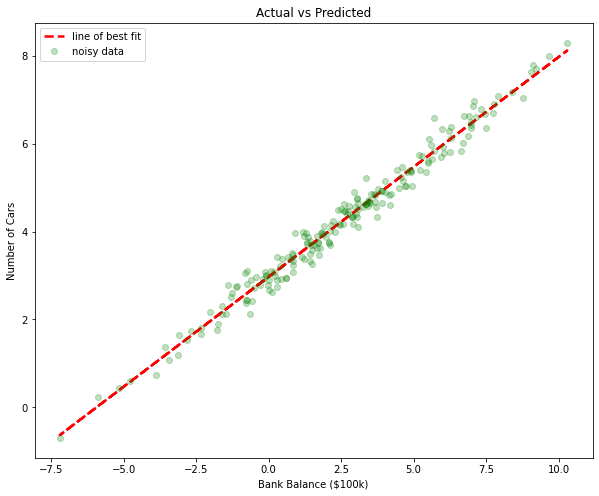

In [180]:
#Compute the mean of X and Y
X_mean = np.mean(X)
Y_mean = np.mean(Y)
print('X mean',X_mean)
print('Y mean',Y_mean)

dta['XYCov'] = (dta['X'] - X_mean) * (dta['Y'] - Y_mean)
dta['XVar'] = (dta['X'] - X_mean) ** 2
beta = dta['XYCov'].sum() / dta['XVar'].sum()
alpha = Y_mean - (beta * X_mean)
print("beta",beta)
print("alpha",alpha)

Ye = alpha + beta * X

#visualise the predicted Y values against the actual values of y
plt.figure(figsize=(10,8))

#regression line
plt.plot(X,Ye, "r--", linewidth=2.5)

#scatter plot of actual data
plt.title("Actual vs Predicted")
plt.plot(X,Y,'go', alpha=0.25)
plt.xlabel('Bank Balance ($100k)')
plt.ylabel('Number of Cars')
plt.legend(["line of best fit", "noisy data"])
plt.show()

That looks simple enough -- say we found out someone had a million dollars in the bank; we could now predict, based on the data above, that they probably have seven or eight cars in the garage!

Well, let's try working with a real dataset like we did last week, just to ground the idea. Remember at the end of last week when I asked you to try fitting a straight line through the pokemon data? Well today, we're going to do that automatically.

First, let's mount our drive and load the data:

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive 
import pandas as pd


drive.mount("/content/gdrive/") 

# load dataset
data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/pokemon.csv")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


Now that we've loaded the dataset, let's slice it to get the same data we worked with last week. We'll plot it, along with the line of best fit we came up with by hand:

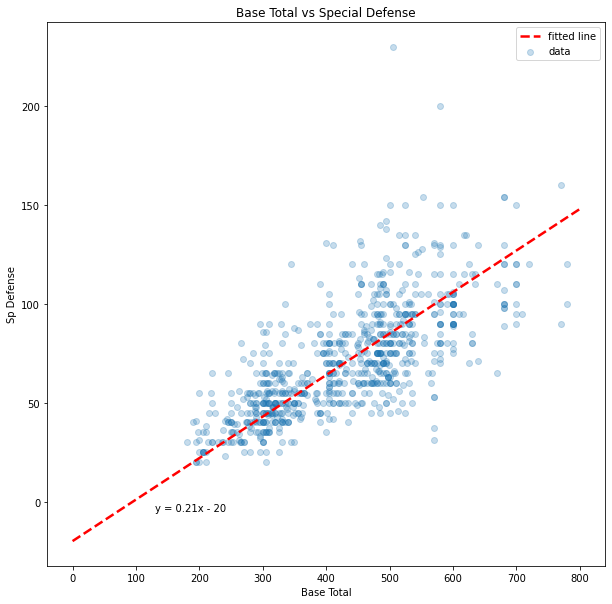

In [179]:
# slice columns of interest
features = data[["sp_defense", "base_total"]]

# create line of best fit by hand
x = np.linspace(0, 800, 1000)
y = 0.21 * x  - 20

# plot the data and the fitted line
plt.figure(figsize=(10,10))
plt.plot(x, y, "--r", linewidth=2.5)
plt.scatter(features["base_total"].to_numpy(), features["sp_defense"].to_numpy(), 
            alpha=0.25)
plt.title("Base Total vs Special Defense")
plt.xlabel("Base Total")
plt.ylabel("Sp Defense")
plt.annotate("y = 0.21x - 20",
            xy=(100, 0), xycoords="data",
            xytext=(130, -5), textcoords="data")
plt.legend(["fitted line", "data"])
plt.show()

Okay, now let's do what we did before, and use OLS to fit a linear model to the data:

In [0]:
x_mean = features["base_total"].mean()
y_mean = features["sp_defense"].mean()
xycov = (features["base_total"] - x_mean) * (features["sp_defense"] - y_mean)
xvar = (features["base_total"] - x_mean) ** 2
features["XYcov"] = xycov
features["Xvar"] = xvar
beta =  features["XYcov"].sum()/features["Xvar"].sum()
alpha = y_mean -  beta * x_mean

And let's see what we get:

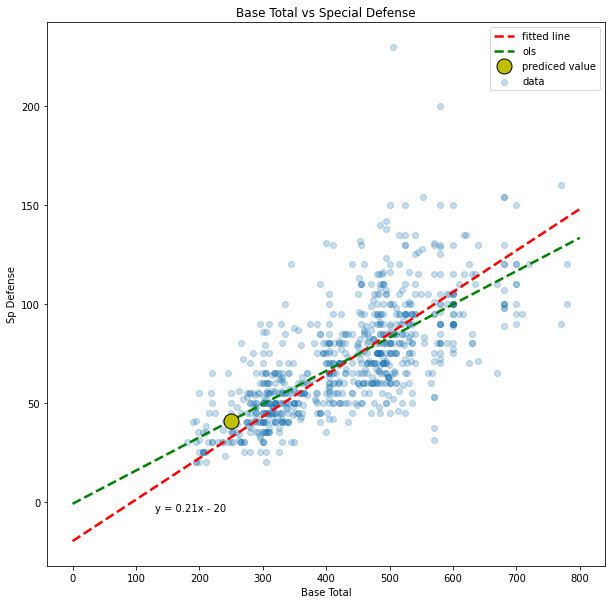

In [156]:
x = np.linspace(0, 800, 1000)
y = 0.21 * x  - 20

X_pred = 250
Y_pred = alpha + X_pred * beta

plt.figure(figsize=(10,10))
plt.plot(x, y, "--r", linewidth=2.5)
plt.plot(x, alpha + x * beta, "g--", linewidth=2.5)
plt.plot(X_pred, Y_pred, "yo", markersize=15, markeredgecolor="k")
plt.scatter(features["base_total"].to_numpy(), features["sp_defense"].to_numpy(), alpha=0.25)
plt.title("Base Total vs Special Defense")
plt.xlabel("Base Total")
plt.ylabel("Sp Defense")
plt.annotate("y = 0.21x - 20",
            xy=(100, 0), xycoords="data",
            xytext=(130, -5), textcoords="data")
plt.legend(["fitted line", "ols", "prediced value", "data"])
plt.show()

As we can see, the line we found is roughly similar to the one we made by hand, and (mathematically at least) is likely to be better. If we wanted to make a prediction about a pokemon's sp_defense based on its base total, we could use this line to have a good idea of what the value would be. For example, plotted on the figure above, we can see that a pokemon with a base total of 250 points has an average sp_defense value of around 45.

### 2.2 Using SKLearn
So the above is all well and good, but it's a bit tedious to have to write out the computation. Thankfully, we don't always need to implement this ourselves, since there are many libraries available that will do it for us. In this notebook, I'll show you how to use **SKLearn**, to fit linear regression models of any number of dimensions. 

First off, we'll need a dataset that we can use. SKLearn comes **inbuilt with many classic datasets**, so we'll take advantage of that. Below, we import SKLearn, and load the Boston Housing dataset.

In [20]:
from sklearn import linear_model, datasets ## imports datasets from scikit-learn

data = datasets.load_boston() ## loads Boston dataset from datasets library 
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


These are our **features** -- essentially the **x-coordinates** of our scatter plot. And just so that we know what we're looking at, I've summarized the label meanings in the table below:


|**Label**|**Meaning**                     |
|----|-----------------------------|
|**crim**|per capita crime rate by town.|
|**zn**|proportion of residential land zoned for lots over 25,000 sq.ft.|
|**indus**|proportion of non-retail business acres per town.|
|**chas**|Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).|
|**nox**|nitrogen oxides concentration (parts per 10 million).|
|**rm**|average number of rooms per dwelling.|
|**age**|proportion of owner-occupied units built prior to 1940.|
|**dis**|weighted mean of distances to five Boston employment centres.|
|**rad**|index of accessibility to radial highways.|
|**tax**|full-value property-tax rate per \$10,000.|
|**ptratio**|pupil-teacher ratio by town.|
|**black**|1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.|
|**lstat**|lower status of the population (percent).|
|**medv**|median value of owner-occupied homes in \$1000s.|

Next, we'll load our target values; that is, the **y-coordinates** of our scatter plot.

In [21]:
# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


What we've done here is take the "median value" column of our dataset, and we've made it our target for linear regression. That is, we are going to use the other features in the dataset to fit a model so that we can predict house prices. As we would expect, the targets correspond to single datapoint values.

Let's start off by looking into the data a bit. First, we'll find the correlation of each feature with the target feature (median house price), which will tell us which features have the biggest effect on the median house price value. We'll do this by creating a temporary dataframe with all of the features and the target, getting the correlation using the .corr() function, and then taking only the correlations with "MEDV".

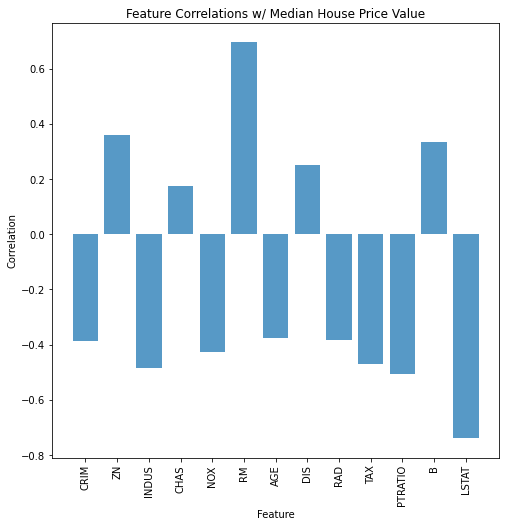

In [83]:
import matplotlib.pyplot as plt

labels = df.columns
temp = df.copy()
temp["MEDV"] = target
correlations = temp.corr()["MEDV"]
plt.figure(figsize=(8,8))
plt.bar(labels, correlations[:-1], alpha=0.75)
plt.title("Feature Correlations w/ Median House Price Value")
plt.xlabel("Feature")
plt.ylabel("Correlation")
plt.xticks(rotation="vertical")
plt.show()

Okay, so now we have a bar chart that shows the correlation between each feature and the target value. A lot of this is what you would expect: crime rate and nitrogen oxide (a form of air pollution) are negatively negatively correlated with price. Similarly, the average number of rooms is positively correlated, meaning houses with more rooms tend to be more expensive.

Okay, let's split our data into a **training set** and a **test set**, and train up a linear regression model. We need to split the data because we want to avoid overfitting:

![overfit](https://miro.medium.com/max/1400/1*_7OPgojau8hkiPUiHoGK_w.png)

Having a test/training split will help us achieve this.

In [0]:
from sklearn.model_selection import train_test_split

X = df
y = target["MEDV"]
X_train, X_test, y_train, y_test = train_test_split(X[["RM"]], y, test_size=0.33, random_state=42)

Now that that's done, we'll fit a linear classifier that has a single X feature, and the target. This is exactly the same as what we did before with the dummy dataset, and the Pokemon dataset, only now, we're using SKLearn to do the maths for us. Which feature should we choose? Well, let's experiment a bit. We'll train two -- one using the feature with the highest correlation, and another using a feature with a correlation close to zero. What would you expect to see?

First up, the high correlation feature:

In [0]:
lm = sk.linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

Now that the model is fitted, let's access some parameters:

In [94]:
predictions = lm.predict(X_test)
print("Predicted Values")
print(predictions[0:5])
print()

print("Test Set Score")
print(lm.score(X_test, y_test))
print()

print("Beta")
print(lm.coef_)
print()

print("Alpha")
print(lm.intercept_)
print()

Predicted Values
[23.77234094 26.86370395 19.85842227 20.59962626 22.69669123]

Test Set Score
0.48345901689194865

Beta
[9.03907314]

Aplha
-34.22235234632533



So what are we looking at? The predicted values are the values our model predicts for the x-values given by the data. The score is the strength of the fit, and the other two values are the $\alpha$ and $beta$ parameters that our model has found. Since we only chose a single feature, let's plot the linear model's predictions:

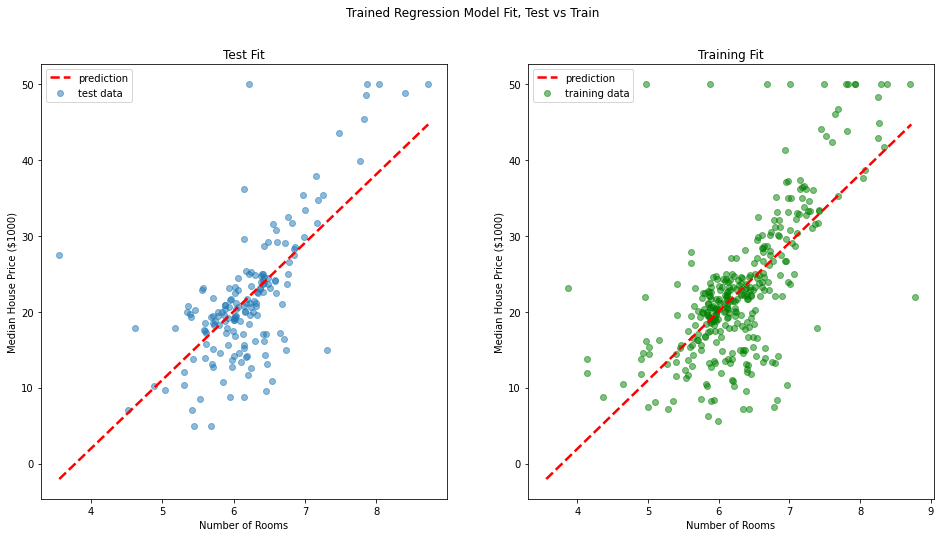

In [112]:
xs = np.linspace(X_test.min(), X_test.max(), 1000)
ys = lm.predict(xs)

fig,ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(xs, ys, "r--", linewidth=2.5)
ax[0].scatter(X_test, y_test, alpha=0.5)
ax[0].set_title("Test Fit")
ax[0].set_xlabel("Number of Rooms")
ax[0].set_ylabel("Median House Price ($1000)")
ax[0].legend(["prediction", "test data"])

ax[1].plot(xs, ys, "r--", linewidth=2.5)
ax[1].scatter(X_train, y_train, c="g", alpha=0.5)
ax[1].set_title("Training Fit")
ax[1].set_xlabel("Number of Rooms")
ax[1].set_ylabel("Median House Price ($1000)")
ax[1].legend(["prediction", "training data"])
plt.suptitle("Trained Regression Model Fit, Test vs Train")

plt.show()

As we can see, the model is fitting a line of best fit through the data. It looks like the training and test data are broadly similar, but the fit with the training data is stronger than it is with the test data. That's to be expected, since we fit the model to the training data.

Okay, let's have a look to see what would have happened if we'd chosen a feature with a correlation close to zero. We'll use the "DIS" feature this time, which corresponds to distance from Boston's employement centers.

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X[["DIS"]], y, test_size=0.33, random_state=42)

lm = sk.linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

predictions = lm.predict(X_test)
print("Predicted Values")
print(predictions[0:5])
print()

print("Test Set Score")
print(lm.score(X_test, y_test))
print()

print("Beta")
print(lm.coef_)
print()

print("Alpha")
print(lm.intercept_)
print()

Predicted Values
[21.76536528 23.31113069 20.92493026 24.61757407 21.46502478]

Test Set Score
0.04308590835304848

Beta
[1.07997304]

Aplha
18.907432626224512



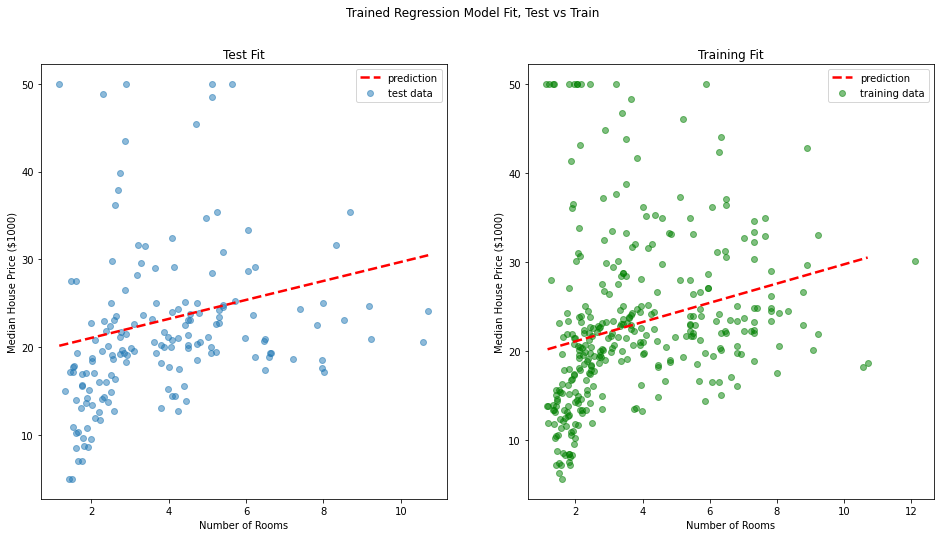

In [114]:
xs = np.linspace(X_test.min(), X_test.max(), 1000)
ys = lm.predict(xs)

fig,ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(xs, ys, "r--", linewidth=2.5)
ax[0].scatter(X_test, y_test, alpha=0.5)
ax[0].set_title("Test Fit")
ax[0].set_xlabel("Number of Rooms")
ax[0].set_ylabel("Median House Price ($1000)")
ax[0].legend(["prediction", "test data"])

ax[1].plot(xs, ys, "r--", linewidth=2.5)
ax[1].scatter(X_train, y_train, c="g", alpha=0.5)
ax[1].set_title("Training Fit")
ax[1].set_xlabel("Number of Rooms")
ax[1].set_ylabel("Median House Price ($1000)")
ax[1].legend(["prediction", "training data"])
plt.suptitle("Trained Regression Model Fit, Test vs Train")

plt.show()

Here we see that the model has a much lower score (it's a worse model), and we can see that when we plot it.

## 3. Multiple Linear Regression
Okay, so what happens if we have multiple features and we want to fit a model to the dataset? In these cases, we can use multiple linear regression, which find a function of the form:

$$y = a + bx_1 +bx_2+...+bx_n$$

Where, as before, our xs are our features, and y is the datapoint. In SKLearn, the process is exactly the same for multiple dimensions as it is for a single dimension. I'll choose two features this time so we can visualize what is happening in 3D. For features, I'll use the two most strongly correlated ones -- RM (high positive correlation) and LSTAT (high negative correlation).

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X[["RM", "LSTAT"]], y, test_size=0.33, random_state=42)

lm = sk.linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

predictions = lm.predict(X_test)
print("Predicted Values")
print(predictions[0:5])
print()

print("Test Set Score")
print(lm.score(X_test, y_test))
print()

print("Beta")
print(lm.coef_)
print()

print("Alpha")
print(lm.intercept_)
print()

Predicted Values
[25.74505916 31.13347279 17.52883188 26.44227535 19.58541492]

Test Set Score
0.6171865588521173

Beta
[ 4.82035621 -0.67873898]

Alpha
0.953454118734399



As we can see, the addition of the extra feature increased the test set score by around 15%. let's plot our predictions and see what we get:

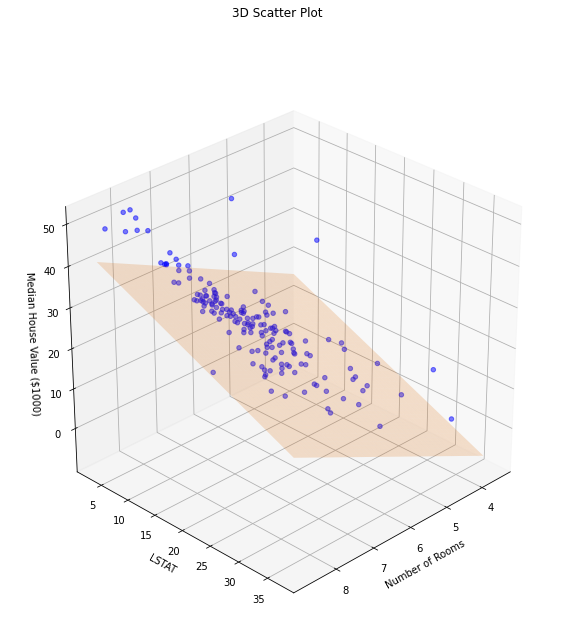

In [132]:
from mpl_toolkits.mplot3d import Axes3D

xs = np.linspace(X_test["RM"].min(), X_test["RM"].max(), 1000)
ys = np.linspace(X_test["LSTAT"].min(), X_test["LSTAT"].max(), 1000)
X, Y = np.meshgrid(xs, ys)
XY = np.hstack([X.ravel().reshape(-1,1), Y.ravel().reshape(-1,1)])
zs = lm.predict(XY)
Z = zs.reshape(X.shape)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_test["RM"], X_test["LSTAT"], y_test, c="blue", marker="o", alpha=0.5)
ax.plot_surface(X, Y, Z, color="C1", alpha=0.2)
plt.suptitle("3D Scatter Plot")
ax.set_xlabel("Number of Rooms")
ax.set_ylabel("LSTAT")
ax.set_zlabel("Median House Value ($1000)")
ax.view_init(30, 45)
plt.draw()
plt.show()

Here we can see that our model has fit a surface to our two features. This makes sense, because we have a single target and two features. We would need to be able to plot in 4D dimensions if we wanted to visualize the same model using 3 features instead of two, so as the number of features increases, it becomes more difficult to visualize what is happening.

## 4. Going Beyond Linear Regression
Okay, so what if we want to fit something more complex than a line? Well, there are two scenarios we're interested in:

1. We have some intuition about the data, and we know the form of the function we need to fit.
2. Cases where we *don't* know what kind of function will fit the data.

In the first case, you can use polynomial regression; that is, finding some relationship:

$$y = ax^2 + bx + c$$

The process is broadly the same as linear regression, except we can no longer fit the function analytically. Instead, we use an optimizer to find the values for $a$, $b$ and $c$.

In cases where we don't have any intuition about the type of function we need, we can use a universal function approximator like a neural network to fit the data.

The following two examples demonstrate these ideas briefly.

### 4.1 Intuition Regarding Data
As mentioned above, if we have some intuition about the data, we can use this intuition to fit a function. For example, say we have the following dataset:

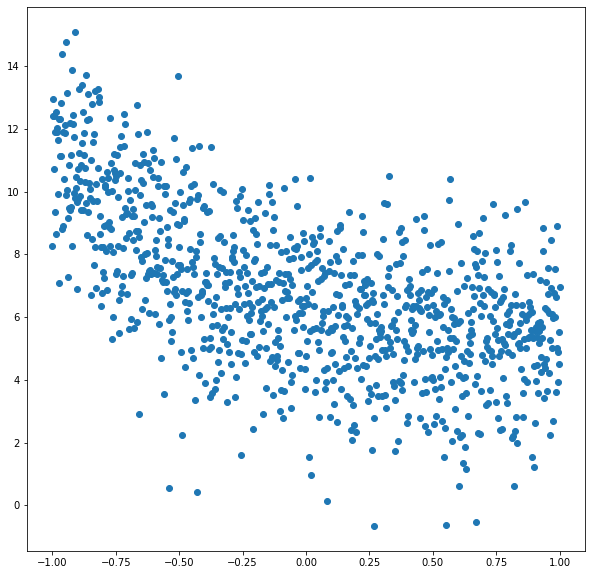

In [191]:
samples = 1000
x = np.linspace(-1, 1, samples)                         # x range
A = np.random.randn() * 10                            # generate random slope
B = np.random.randn() * 10                            # generate random intercept
C = np.random.randn() * 10
y = (A * x ** 2 + B * x + C) + 2 * np.random.randn(samples)                # add noise to the function

plt.figure(figsize=(10,10))
plt.scatter(x, y)
plt.show()

A human being could look at that data, and guess that a quadratic function would be a good fit. Knowing this, we could then find the constants $a$, $b$ and $c$ for a quadratic function that best fit this data. How do we do this? Well, the basic process is the same as before:

A value:  2.2252777726910358
B value:  -2.7103549320058984
C value 6.041695073863402
Found values:  [ 2.36080938 -2.64715501  6.04802565]


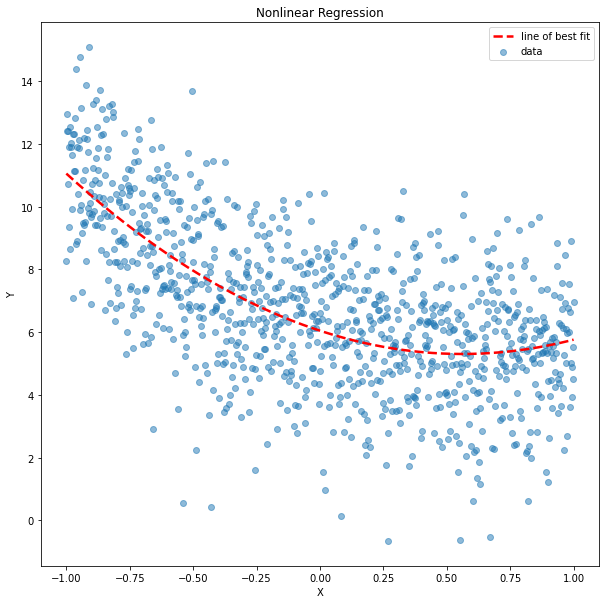

In [194]:
from scipy.optimize import minimize

def cost(theta, x, targ):
    """
    Our cost function
    """
    pred = theta.T.dot(x)
    loss = -0.5*(pred-targ)**2
    loss = -np.mean(loss, axis=-1)
    return loss

x_vec = np.vstack([x ** 2, x, np.ones(x.shape)])
theta_0 = np.random.randn(x_vec.shape[0], 1)
theta = minimize(cost, theta_0, args=(x_vec, y), method="CG")

print("A value: ", A)
print("B value: ", B)
print("C value", C)
print("Found values: ", theta.x)

y_pred = np.array(theta.x).dot(x_vec)
plt.figure(figsize=(10,10))
plt.scatter(x, y, alpha=0.5)
plt.plot(x, y_pred, "r--", linewidth=2.5)
plt.title("Nonlinear Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(["line of best fit","data"])
plt.show()

As we can see, our intuition has found a pretty good fit to the data, but this is a toy example that we can easily visualize. In higher dimensions, some analysis and trial-and-error would be needed to determine relationships within the data that let us choose the right function. In these situations, it's better to resort to universal function approximators.

### 4.2 No intuition about the data!
So what do we do here? Well, as mentioned, we can use universal function approximators, of which neural nets are a popular example. So lets do that here. We'll use a similar example to the one above, except this time we'll fit a neural net to the data using Pytorch. This won't give you much intuition to what a neural network is doing, but it will give you an idea of how to apply them.

First, we need to create our neural network:

In [0]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.elu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

So the network above has a single hidden layer (kind of like the neurons in your brain), and it outputs some prediction based on the inputs we give it. The forward function is the function that passes information through the network, and outputs our predicted value. Next, we'll train it:

Final loss is: 0.00422


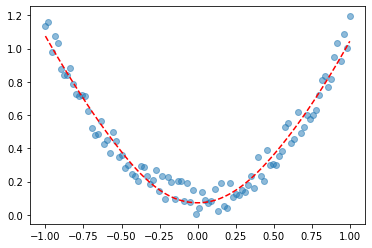

In [0]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)
net = Net(n_feature=1, n_hidden=32, n_output=1)
optimizer = torch.optim.SGD(net.parameters(), lr=1e-1)
loss_func = torch.nn.MSELoss()

for t in range(500):
    prediction = net(x)     # input x and predict based on x
    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)
    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

print("Final loss is: {:.5f}".format(loss.item()))
plt.scatter(x.data.numpy(), y.data.numpy(), alpha=0.5)
plt.plot(x.data.numpy(), prediction.data.numpy(), 'r--')
plt.show()

As you can see, we manage to fit a function to the data fairly quickly and easily, and the approximation looks quite good. One of the challenges with using neural nets is that we can't then convert this fitted function into something that we can easily interpret, but this isn't so bad -- we often apply neural nets to data that humans have difficulty interpreting anyway.

## 5. Exercises
In the following cell, I download the "diabetes" dataset. Exercises are given below:

In [188]:
from sklearn.datasets import load_diabetes

# exercises
# diabetes dataset
X, y = load_diabetes(return_X_y=True)

df = pd.DataFrame(X, columns=["age", 
                              "sex", 
                              "bmi", 
                              "avg_blood_pressure", 
                              "s1", 
                              "s2", 
                              "s3", 
                              "s4", 
                              "s5", 
                              "s6",])
target = pd.DataFrame(y, columns=["progression"])

df.head()

,age,sex,bmi,avg_blood_pressure,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


1. Split your data into a training set and a test set. (1 point)

In [0]:
# code goes here

2. Plot a bar chart showing the correlation between features in the training set, and the target values (2 points)

In [0]:
# code goes here

3. Pick two features, and for each one, fit a linear model to the data. Then, plot the line of best fit going through the data (see the above examples). (4 points)

In [0]:
# code for first model goes here

In [0]:
# code for second model goes here

4. fit a multilinear model using the two best features -- how does this estimate compare to the previous models? (3 points)

In [0]:
# code goes here